# 机器学习：实践作业三

**王海生 10235101559**

In [1]:
# 环境配置

%pip install scikit-learn numpy matplotlib

# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, f1_score, auc

Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 数据准备

# 加载Iris数据集
iris = load_iris()

# 取前两类数据，作为2分类数据集
X = iris.data[:100, :2]  # 取前两个特征
y = iris.target[:100]    # 标签：0和1

In [3]:
# 数据读取与处理

# 查看部分数据（40-60行）
print("部分数据（40-60行）：")
print(X[40:60])
print("对应标签（40-60行）：")
print(y[40:60])

部分数据（40-60行）：
[[5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]]
对应标签（40-60行）：
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


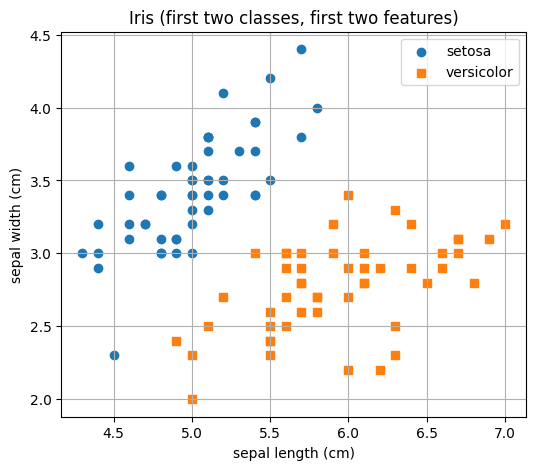

In [4]:
# 取样本的前两个属性进行可视化
plt.figure(figsize=(6,5))
plt.scatter(X[y==0, 0], X[y==0, 1], marker='o', label=iris.target_names[0])
plt.scatter(X[y==1, 0], X[y==1, 1], marker='s', label=iris.target_names[1])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris (first two classes, first two features)")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# 使用train_test_split划分数据集，8:2比例，随机种子11
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(f"训练集形状: {X_train.shape}, 测试集形状: {X_test.shape}")

训练集形状: (80, 2), 测试集形状: (20, 2)


In [6]:
# 模型建立与训练

# 使用Scikit-learn提供的LogisticRegression作为逻辑回归模型
# 设置超参数：正则化系数C=1.0（默认），求解器lbfgs，最大迭代次数10
model = LogisticRegression(C=1.0, solver='lbfgs', max_iter=10)

# 使用训练集对模型进行训练
model.fit(X_train, y_train)
print("模型训练完成")

模型训练完成


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# 模型评估

# 计算模型在测试集上的精度
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"测试集精度: {accuracy:.4f}")

测试集精度: 1.0000


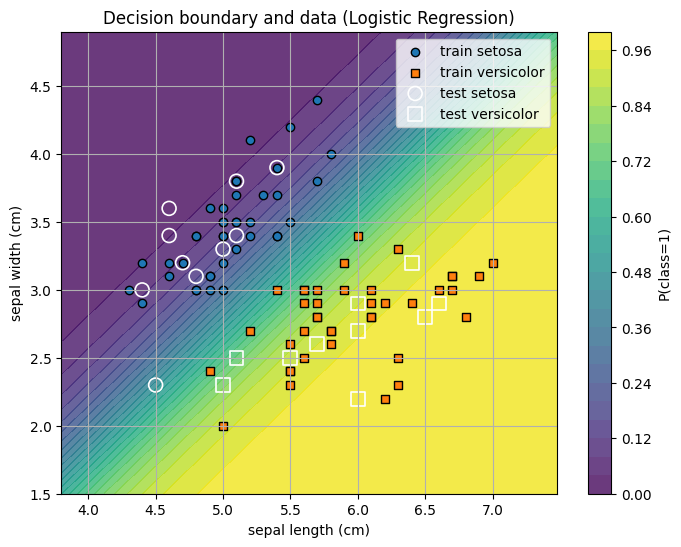

In [8]:
# 可视化决策边界

h = 0.02  # 网格步长
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# 获取预测概率
Z = model.predict_proba(grid)[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))

# 使用等高线填充显示概率（决策边界为 0.5）
contour = plt.contourf(xx, yy, Z, levels=25, alpha=0.8)
plt.colorbar(contour, label='P(class=1)')

# 绘制训练数据点
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], edgecolor='k', marker='o', label='train '+iris.target_names[0])
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], edgecolor='k', marker='s', label='train '+iris.target_names[1])

# 绘制测试数据点（用白色边框突出显示）
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], facecolors='none', edgecolor='white', marker='o', s=100, linewidth=1.2, label='test '+iris.target_names[0])
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], facecolors='none', edgecolor='white', marker='s', s=100, linewidth=1.2, label='test '+iris.target_names[1])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Decision boundary and data (Logistic Regression)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

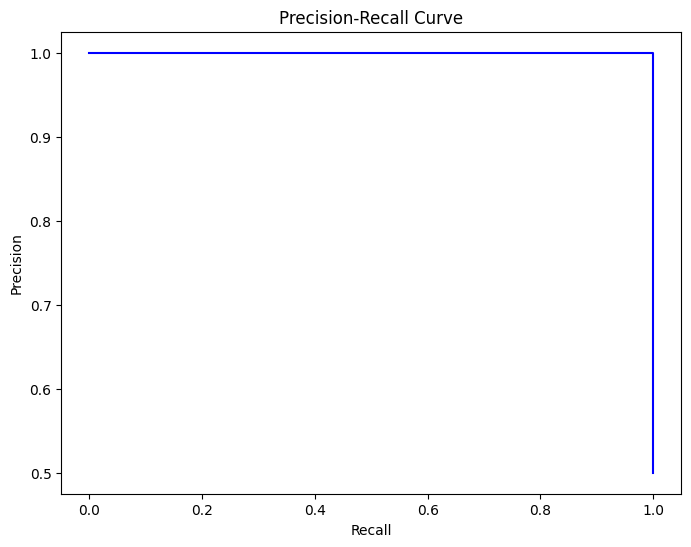

In [9]:
# 绘制PR曲线、ROC曲线并计算F1值

# PR曲线
y_prob = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

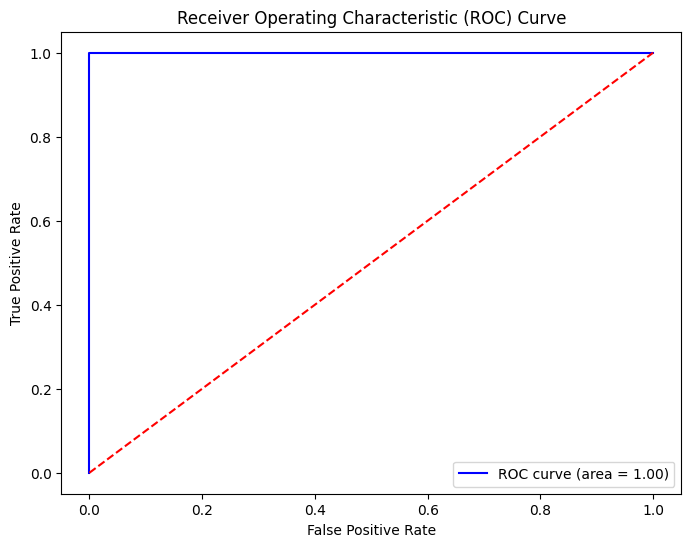

In [10]:
# ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [11]:
# 计算F1值
f1 = f1_score(y_test, y_pred)
print(f"F1值: {f1:.4f}")

F1值: 1.0000
